<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

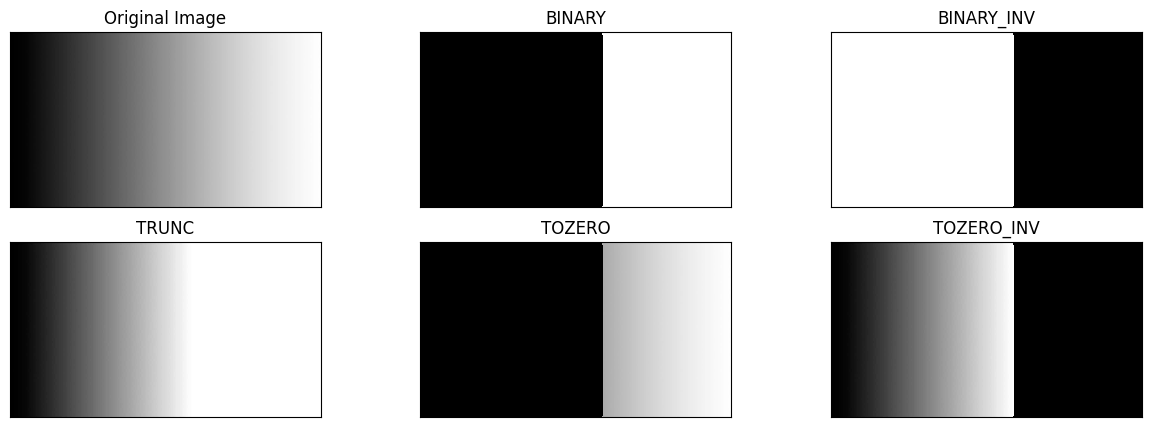

In [4]:
def global_thresholding(image_path, threshold_value):
    # Load the image
    img = cv.imread(image_path, 0)  # Load as grayscale image

    # 1. Binary threshold
    ret, thresh1 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

    # 2. Binary threshold inverse
    ret, thresh2 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY_INV)

    # 3. Threshold Truncate
    ret, thresh3 = cv.threshold(img, threshold_value, 255, cv.THRESH_TRUNC)

    # 4. Threshold Tozero
    ret, thresh4 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO)

    # 5. Threshold Tozero Inverse
    ret, thresh5 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO_INV)

    # Define titles and images for display
    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

    # Plot images
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray', interpolation='nearest')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

# Example of how to call the method
image_path = '/content/drive/MyDrive/PCVK/image/Assets/gradient.jpg'
threshold_value = 170
global_thresholding(image_path, threshold_value)


**OTSU Threesholding**

<ipython-input-5-850e9adac029>:24: RuntimeWarning: invalid value encountered in divide
  between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))


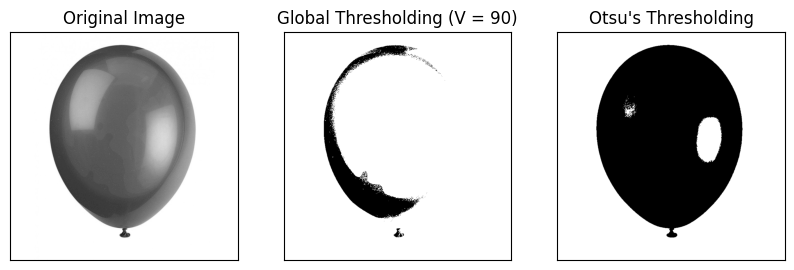

Optimal threshold calculated by Otsu's method: 185


In [5]:
# Function for applying global thresholding
def global_thresholding(img, thresh_value):
    _, global_thresh = cv.threshold(img, thresh_value, 255, cv.THRESH_BINARY)
    return global_thresh

# Load the image
filename = '/content/drive/MyDrive/PCVK/image/Assets/balloon.jpg'
img = cv.imread(filename, 0)  # Load as grayscale image

# Calculate histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Normalize the histogram
hist = hist.astype(float) / hist.sum()

# Compute cumulative sum and cumulative mean
cumulative_sum = np.cumsum(hist)
cumulative_mean = np.cumsum(hist * np.arange(256))

# Global mean (mean of the entire image)
global_mean = cumulative_mean[-1]

# Compute the between-class variance for each threshold
between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))

# Handle division by zero (replace invalid values with zero)
between_class_variance = np.nan_to_num(between_class_variance)

# Find the threshold that maximizes the between-class variance
optimal_threshold = np.argmax(between_class_variance)

# Apply global thresholding (using a manually chosen threshold value for demonstration)
global_thresh_value = 90
global_result = global_thresholding(img, global_thresh_value)

# Apply Otsu's thresholding using the optimal threshold
_, otsu_result = cv.threshold(img, optimal_threshold, 255, cv.THRESH_BINARY)

# Display the original image, global thresholding, and Otsu's thresholding
titles = ['Original Image', 'Global Thresholding (V = 90)', "Otsu's Thresholding"]
images = [img, global_result, otsu_result]

plt.figure(figsize=(10, 5))
for i in range(3):  # Loop for 3 images
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Display the optimal threshold value calculated by Otsu's method
print(f"Optimal threshold calculated by Otsu's method: {optimal_threshold}")


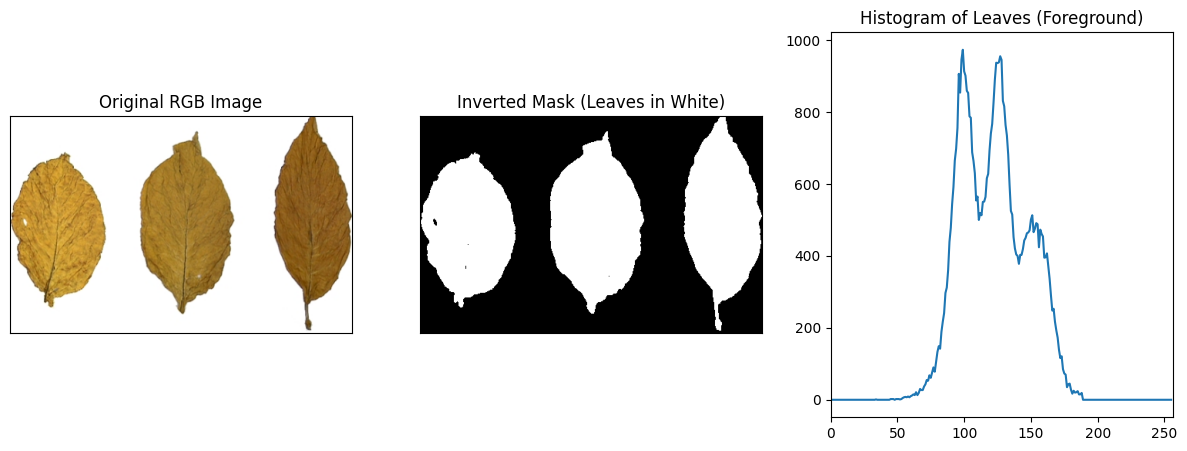

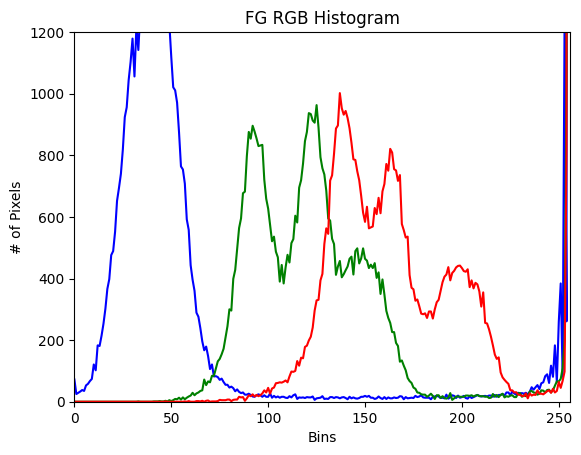

-1

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color (BGR format)
filename = '/content/drive/MyDrive/PCVK/image/Assets/tobacco.jpg'
img_color = cv.imread(filename)  # Load the image in color (BGR)

# Convert the image from BGR to RGB for displaying in matplotlib
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Load the image in grayscale
img_gray = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Load as grayscale image

# Step 1: Use Otsu's method to create a binary mask where leaves (foreground) are white
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the mask so that leaves are white and the background is black
mask_inv = cv.bitwise_not(mask)

# Step 2: Calculate the histogram for the segmented (foreground) image using the inverted mask
hist_foreground = cv.calcHist([img_gray], [0], mask_inv, [256], [0, 256])

# Step 3: Plot the original RGB image, mask, and histogram
plt.figure(figsize=(15, 5))

# Plot the original RGB image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)  # Display the RGB image
plt.title('Original RGB Image')
plt.xticks([]), plt.yticks([])

# Plot the inverted mask (foreground is white)
plt.subplot(1, 3, 2)
plt.imshow(mask_inv, cmap='gray')  # Display the mask
plt.title('Inverted Mask (Leaves in White)')
plt.xticks([]), plt.yticks([])

# Plot the histogram of the foreground (leaves)
plt.subplot(1, 3, 3)
plt.plot(hist_foreground)
plt.title('Histogram of Leaves (Foreground)')
plt.xlim([0, 256])

plt.show()

# Second part: Plot flattened color histogram of another image
chans = cv.split(img_color)
colors = ('b', 'g', 'r')

plt.figure()
plt.title('FG RGB Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')

# Plot histograms for each color channel
for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.ylim([0, 1200])  # Adjusting y-limit based on your requirement

plt.show()
cv.waitKey(0)


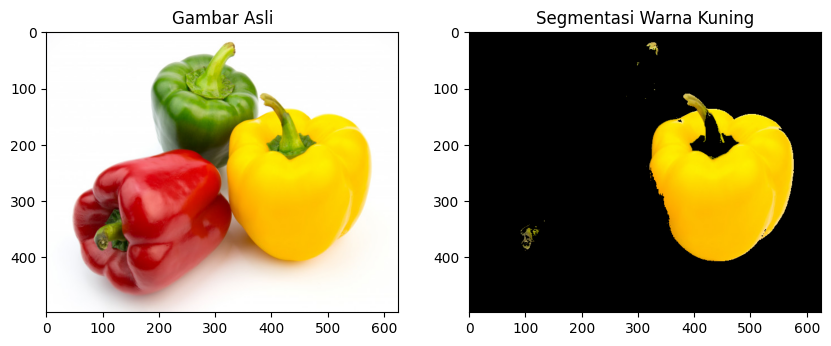

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Baca gambar
filename = '/content/drive/MyDrive/PCVK/image/Assets/peppers.jpg'
img = cv.imread(filename)  # Load the image in color (BGR)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk matplotlib

# Langkah 2: Ubah ke bentuk 2D, tiap piksel sebagai fitur [R,G,B]
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Langkah 3: Tentukan k untuk K-Means
k = 2  # Kita pilih 3 kluster, bisa disesuaikan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Langkah 4: Konversi kembali ke 8-bit
centers = np.uint8(centers)
labels = labels.flatten()

# Langkah 5: Hanya tampilkan warna kuning
# Mendefinisikan rentang HSV untuk warna kuning
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Rentang warna kuning dalam HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Membuat mask untuk warna kuning
mask = cv.inRange(img_hsv, lower_yellow, upper_yellow)

# Terapkan mask ke gambar asli
result = cv.bitwise_or(img, img, mask=mask)

# Langkah 6: Tampilkan hasilnya
plt.figure(figsize=(10, 5))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('on')

# Tampilkan hasil segmentasi warna kuning
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Segmentasi Warna Kuning')
plt.axis('on')

plt.show()
